<div class="alert alert-block alert-info" style="text-align: center; color: black">
    <h1 style="color: #002AFF">Visualizing Baltimore's Black Butterfly</h1>
    <h2>A Jupyter Notebook by <a href="http://law.ubalt.edu/faculty/profiles/starger.cfm">Colin Starger</a></h2>
    <h3>Presented 7/21/21 @ BNIA Data Week</h3>
</div>


### First step is to import libraries
If library is not yet in your Jupyter installation, use "conda install *lib_name*" to install

In [1]:
#Libraries
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
from geopandas import GeoDataFrame

### Next import a CSV file with BNIA API information into a Pandas dataframe

In [2]:
api_df = pd.read_csv("VS-Indicator-APIs.csv")
api_df.set_index("ShortName", inplace=True) #Makes the dataframe index the shortname
api_df.head(2) #This code simply shows the first two rows of the file

,Indicator Number,Indicator,Section,API
ShortName,,,,
tpopXX,1,Total Population,Census Demographics,https://services1.arcgis.com/mVFRs7NF4iFitgbY/...
maleXX,2,Total Male Population,Census Demographics,https://services1.arcgis.com/mVFRs7NF4iFitgbY/...


### Functions to manipulate the information in API df <br>Permits users to load Indicators by "ShortName" into GeoPandas dataframes

In [3]:
def getGDFfromURL(url, layer=0):
    #GDF stands for GeoDataFrame; this is the innermost function called by getGDF
    tail = "/"+str(layer)+"/query?where=1%3D1&outFields=*&outSR=4326&f=json" #worked this out
    url+=tail
    print(url)
    gdf = gpd.read_file(url) #GeoPandas has a built in function to read APIs given right URL
    return gdf

def getGDF(shortname, level=0):
    #This is outermost function called by user; it calls getGDFfromURL
    url = api_df.loc[shortname, "API"]
    return getGDFfromURL(url, level)

### Example using percentage of African Americans (paaXX shortname)

In [4]:
paaXX_df = getGDF("paaXX")
paaXX_df.head(2) #Display first two rows

https://services1.arcgis.com/mVFRs7NF4iFitgbY/arcgis/rest/services/Paa/FeatureServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json


,OBJECTID,CSA2010,paa10,paa15,paa16,paa17,paa18,paa19,Shape__Area,Shape__Length,geometry
0,1,Allendale/Irvington/S. Hilton,88.166739,86.865672,87.409876,90.284587,88.713401,89.072573,6.377046e+07,38770.165571,"POLYGON ((-76.65726 39.27600, -76.65726 39.276..."
1,2,Beechfield/Ten Hills/West Hills,78.864971,78.078191,78.662984,75.319244,76.672017,77.989574,4.788253e+07,37524.950533,"POLYGON ((-76.69479 39.30201, -76.69465 39.301..."


### Use level=1 to get Baltimore City total data<br>(I don't use this in rest of Notebook; just FYI)

In [5]:
paaXX_df = getGDF("paaXX", level=1)
paaXX_df #echos entire dataframe, which is only one row

https://services1.arcgis.com/mVFRs7NF4iFitgbY/arcgis/rest/services/Paa/FeatureServer/1/query?where=1%3D1&outFields=*&outSR=4326&f=json


,OBJECTID,City,paa10,paa15,paa16,paa17,paa18,paa19,Shape__Area,Shape__Length,geometry
0,1,Baltimore City,63.81723,62.264039,62.420451,62.251289,61.922238,61.770646,2.264963e+09,528245.410049,"MULTIPOLYGON (((-76.58120 39.20734, -76.58088 ..."


## Basic Plotting Using GeoPandas/Matplot lib

https://services1.arcgis.com/mVFRs7NF4iFitgbY/arcgis/rest/services/Paa/FeatureServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json


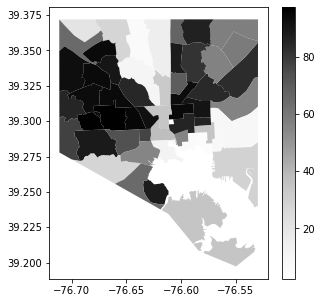

In [6]:
def plotStd(shortname, year=19, figsize=(5,5), legend=True, cmap="Greys"):
    #Will generate a choropleth using built in GeoPandas plotting 
    #Get the GDF and then chose the column to plot
    gdf = getGDF(shortname)
    targetCol = shortname[:-2]+str(year)
    gdf.plot(targetCol,figsize=figsize, legend=legend, cmap=cmap)

#Calling the function using Percentage African Americans (paaXX) indicator
plotStd("paaXX")

### PaaXX indicator example using different options

https://services1.arcgis.com/mVFRs7NF4iFitgbY/arcgis/rest/services/Paa/FeatureServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json


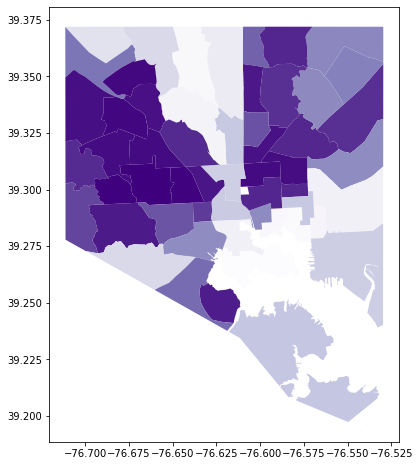

In [7]:
#Another example using different column and defaults
plotStd("paaXX", year=18, figsize=(8,8), legend=False, cmap="Purples")

## <font color=blue>Code Below Used to Create Grid of Maps from Figure 1 of Butterfly in COVID<font>

In [8]:
#Global vars

#List of "reverse indicators" - where LESS should be lighter (as opposed to standard MORE=lighter)
reverse_list=["kraXX", "hfaiXX", "regvoteXX", "pwhiteXX", "mhhiXX", "ownrocXX", "lifexpXX", "votedXX", 'libcardXX', 'hfaiXX', 'readyXX']


#These are the 16 indicators I settled on as most relevant
master_list= [['paaXX', 'femhhsXX', 'mhhiXX', 'hhpovXX'],
             ['hhchpovXX', 'ownrocXX', 'vacantXX', 'nohhintXX'],
             ['tanfXX', 'lifexpXX', 'votedXX', 'abshsXX'],
             ['nilfXX','lesshsXX', 'pubtranXX', 'novhclXX']]

In [9]:
#Functions to collect the GDFs in master_list and then format for grid creation

def getCollect(check_list):
    #This function collects all the target GDFs and puts into collection
    collect=[]
    for shortname in check_list:
        gdf=getGDF(shortname)
        collect.append(gdf)    
    return collect

def createShortNameList(check_list, num_cols):
    #Formatting list of lists to help create grid
    l=len(check_list)
    num_rows = l//num_cols
    if (l%num_cols)>0:
        num_rows+=1
    count=0
    shortname_list=[]
    
    for i in range(num_rows):
        row=[]
        for i in range(num_cols):
            if (count<l):
                row.append(check_list[count])
            count+=1
        shortname_list.append(row)
    return shortname_list

In [10]:
#Run the functions from above
#Convert master_list global variable into collect variable
check_list = [item for sublist in master_list for item in sublist]
collect=getCollect(check_list)

#Create shortname_list for use in creation of grid
ncols=4
shortname_list=createShortNameList(check_list,ncols)

https://services1.arcgis.com/mVFRs7NF4iFitgbY/arcgis/rest/services/Paa/FeatureServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json
https://services1.arcgis.com/mVFRs7NF4iFitgbY/arcgis/rest/services/Femhhs/FeatureServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json
https://services1.arcgis.com/mVFRs7NF4iFitgbY/arcgis/rest/services/Mhhi/FeatureServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json
https://services1.arcgis.com/mVFRs7NF4iFitgbY/arcgis/rest/services/Hhpov/FeatureServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json
https://services1.arcgis.com/mVFRs7NF4iFitgbY/arcgis/rest/services/Hhchpov/FeatureServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json
https://services1.arcgis.com/mVFRs7NF4iFitgbY/arcgis/rest/services/Ownroc/FeatureServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json
https://services1.arcgis.com/mVFRs7NF4iFitgbY/arcgis/rest/services/Vacant/FeatureServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json
https://services1.arcgis.com/mVFRs7NF4i

### Plotting and color variables and code <br>Note the cmaps can be found at [this link](https://matplotlib.org/stable/gallery/color/colormap_reference.html)

In [11]:
#Global cmaps
pu_seq = ['viridis', 'plasma', 'inferno', 'magma', 'cividis']

seq1 = [ 'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
            'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
            'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']
seq2 = ['binary', 'gist_yarg', 'gist_gray', 'gray', 'bone', 'pink',
            'spring', 'summer', 'autumn', 'winter', 'cool', 'Wistia',
            'hot', 'afmhot', 'gist_heat', 'copper']

In [12]:
def plotCheck(collect,shortname_list,cmap_list=pu_seq):
    #This is grid plot function
    #Creates GRAPHIC and returns KEY
    
    #Maps based on what is in collect list
    #create rows and cols for fig
    rows=len(shortname_list)
    cols=len(shortname_list[0]) # assume even columns
    
    #Standard MatPlotLib code
    fig, axs = plt.subplots(rows, cols)
    fig.set_size_inches(cols*3, rows*3) #For now hardcoding three inch plots
    
    key_df=pd.DataFrame(columns=["ShortName", "Indicator", "Comment"])
    for i, col_list in enumerate(shortname_list):
        for j, shortname in enumerate(col_list):
            
            indicator=api_df.loc[shortname,"Indicator"]
            n=(i*cols)+j
            gdf=collect[n]
            target=list(gdf.columns)[-4]
            comment=""
            cmap=cmap_list[i%len(cmap_list)]
            
            #This reverses the choropleth
            if shortname in reverse_list:
                cmap=cmap+"_r"
                comment="Inverse"
            
            key_df=key_df.append({"ShortName": target, "Indicator": indicator, "Comment":comment},
                                 ignore_index=True)
            gdf.plot(target,ax=axs[i,j],cmap=cmap)
            axs[i,j].set_axis_off()
            axs[i,j].set_title(target)

    #Check to turn off "extra" plots 
    extra=(rows*cols)-len(collect)
    if (extra):
        for j in range(cols-extra, cols):
            axs[rows-1,j].set_axis_off()
            
    return key_df

## Code to call function that will draw the grid figure (Figure 1)

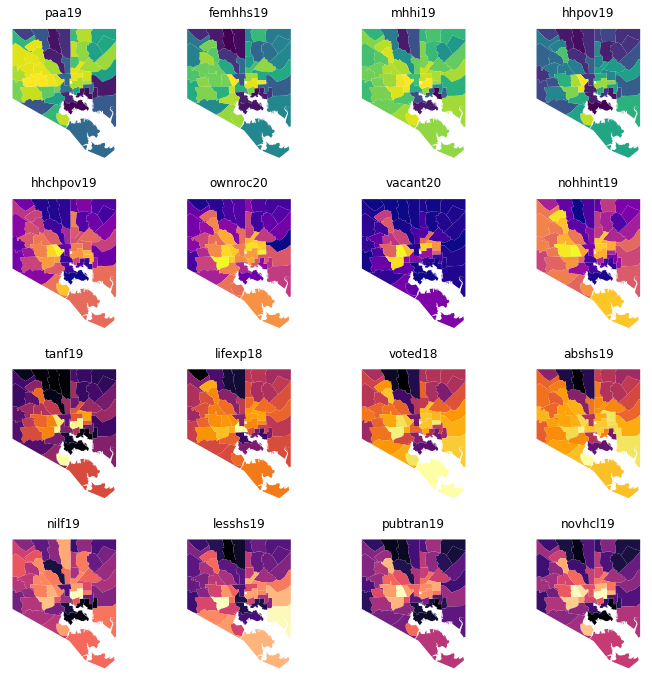

In [13]:
#Call plotCheck and return key
#Passes in the collect and shortname_list vars created above
key=plotCheck(collect,shortname_list)

In [14]:
#Echo the key
key

,ShortName,Indicator,Comment
0,paa19,Percent of Residents - Black/African-American ...,
1,femhhs19,Percent of Female-Headed Households with Child...,
2,mhhi19,Median Household Income,Inverse
3,hhpov19,Percent of Family Households Living Below the ...,
4,hhchpov19,Percent of Children Living Below the Poverty Line,
5,ownroc20,Percentage of Housing Units that are Owner-Occ...,Inverse
6,vacant20,Percentage of Residential Properties that are ...,
7,nohhint19,Percent of Households with No Internet at Home,
8,tanf19,Percent of Families Receiving TANF,
9,lifexp18,Life Expectancy,Inverse


In [15]:
#Another example just to show the flexibility

#This is a 20 indicator grid
master_list= [['paaXX', 'femhhsXX', 'mhhiXX', 'hhpovXX'],
             ['hhchpovXX', 'ownrocXX', 'readyXX', 'vacantXX'],
             ['nohhintXX', 'gunhomXX','aastudXX','abshsXX'],
             ['tanfXX', 'lifexpXX', 'libcardXX', 'votedXX'],
             ['nilfXX','lesshsXX', 'pubtranXX', 'novhclXX']]

#Convert master_list global variable into collect variable
check_list = [item for sublist in master_list for item in sublist]
collect2=getCollect(check_list)

#Create shortname_list for use in creation of grid
ncols=5
shortname_list=createShortNameList(check_list,ncols)

https://services1.arcgis.com/mVFRs7NF4iFitgbY/arcgis/rest/services/Paa/FeatureServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json
https://services1.arcgis.com/mVFRs7NF4iFitgbY/arcgis/rest/services/Femhhs/FeatureServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json
https://services1.arcgis.com/mVFRs7NF4iFitgbY/arcgis/rest/services/Mhhi/FeatureServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json
https://services1.arcgis.com/mVFRs7NF4iFitgbY/arcgis/rest/services/Hhpov/FeatureServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json
https://services1.arcgis.com/mVFRs7NF4iFitgbY/arcgis/rest/services/Hhchpov/FeatureServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json
https://services1.arcgis.com/mVFRs7NF4iFitgbY/arcgis/rest/services/Ownroc/FeatureServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json
https://services1.arcgis.com/mVFRs7NF4iFitgbY/arcgis/rest/services/Ready/FeatureServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json
https://services1.arcgis.com/mVFRs7NF4iF

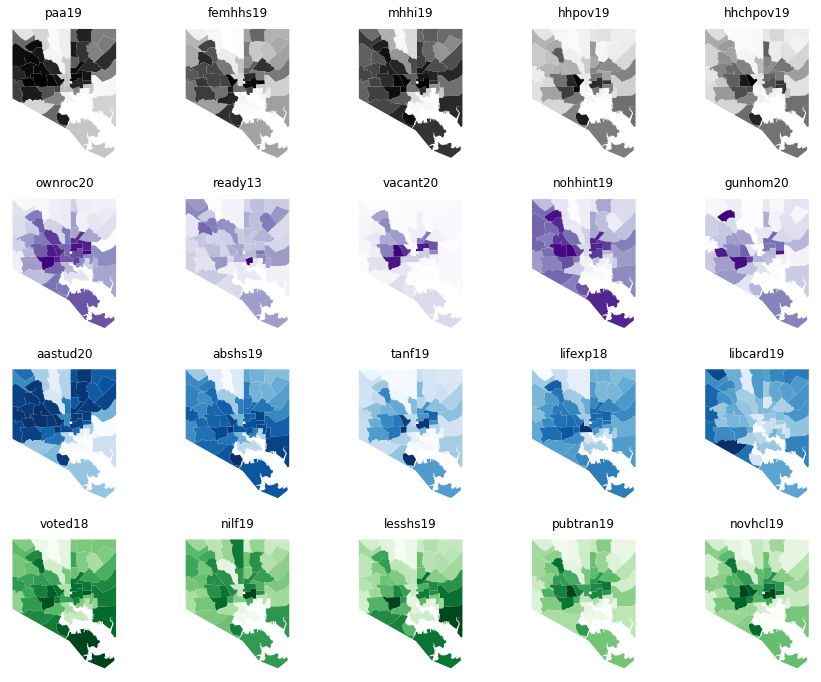

In [16]:
#Drawing using different color scheme
key=plotCheck(collect2,shortname_list, cmap_list=seq1)

In [17]:
#Echo key 
key

,ShortName,Indicator,Comment
0,paa19,Percent of Residents - Black/African-American ...,
1,femhhs19,Percent of Female-Headed Households with Child...,
2,mhhi19,Median Household Income,Inverse
3,hhpov19,Percent of Family Households Living Below the ...,
4,hhchpov19,Percent of Children Living Below the Poverty Line,
5,ownroc20,Percentage of Housing Units that are Owner-Occ...,Inverse
6,ready13,Kindergarten School Readiness,Inverse
7,vacant20,Percentage of Residential Properties that are ...,
8,nohhint19,Percent of Households with No Internet at Home,
9,gunhom20,"Number of Gun-Related Homicides per 1,000 Resi...",


In [18]:
# I have found to_clipboard to be a very useful function
# Use Word, paste text, highlight, then TABLE->Convert->Convert Text to Table
key.to_clipboard(index=False)

## <font color=blue>Code to create correlation matrix (Appendix 1) <font>

In [19]:
#Return to first collect to look at correlations
#Create corr_df - Correlations

#Create an empty DF with neighborhoods
corr_df=collect[0][['CSA2010','Shape__Area', 'Shape__Length', 'geometry']].copy()
for gdf in collect:
    target= list(gdf.columns)[-4] #Just adding the 4th from left column (where all my indices of interest are)
    corr_df[target]=gdf[target]
corr_df

,CSA2010,Shape__Area,Shape__Length,geometry,paa19,femhhs19,mhhi19,hhpov19,hhchpov19,ownroc20,vacant20,nohhint19,tanf19,lifexp18,voted18,abshs19,nilf19,lesshs19,pubtran19,novhcl19
0,Allendale/Irvington/S. Hilton,6.377046e+07,38770.165571,"POLYGON ((-76.65726 39.27600, -76.65726 39.276...",89.072573,70.235656,43019.75792,19.177696,32.601602,52.260870,6.469565,24.867462,11.060948,68.288711,41.205319,52.461538,28.619207,19.136664,21.172161,32.024520
1,Beechfield/Ten Hills/West Hills,4.788253e+07,37524.950533,"POLYGON ((-76.69479 39.30201, -76.69465 39.301...",77.989574,55.294954,55017.77971,8.822508,15.384615,75.512465,0.554017,21.257767,4.719388,73.138086,52.467318,46.291560,22.522109,7.039874,9.880466,15.289023
2,Belair-Edison,4.495003e+07,31307.314843,"POLYGON ((-76.56761 39.32636, -76.56746 39.326...",83.997012,72.000000,46703.93468,22.525597,41.038850,54.227591,3.337572,17.457938,7.977011,70.068774,42.797808,51.889169,35.504858,14.770783,24.654239,29.935032
3,Brooklyn/Curtis Bay/Hawkins Point,1.760777e+08,150987.703639,"MULTIPOLYGON (((-76.58867 39.21283, -76.58824 ...",34.721248,43.938332,39162.13858,24.595713,41.388479,36.952960,8.073953,34.659961,10.940852,69.491789,27.979883,58.684654,36.140186,27.089710,22.756139,34.616226
4,Canton,1.540854e+07,23338.611948,"POLYGON ((-76.57140 39.28441, -76.57138 39.284...",4.982422,15.022422,128460.48210,2.216428,4.834254,65.113974,0.396432,6.382429,0.363901,80.788522,57.206685,27.777778,9.329751,4.580259,3.843466,4.754522
5,Cedonia/Frankford,7.154134e+07,39962.549835,"POLYGON ((-76.52972 39.33113, -76.53005 39.331...",83.596137,44.222586,47258.03394,10.876413,17.905647,68.816521,1.191422,16.438654,6.416550,71.840653,44.896751,42.451874,26.047337,12.410714,14.879167,21.824104
6,Cherry Hill,2.914418e+07,22305.302067,"POLYGON ((-76.61525 39.24102, -76.61530 39.241...",88.392129,73.451327,26654.08088,37.760000,58.080194,43.610548,5.983773,29.613734,18.658892,70.296555,31.143498,67.056075,40.462550,18.549422,29.778507,53.945196
7,Chinquapin Park/Belvedere,2.102259e+07,21705.411630,"POLYGON ((-76.59491 39.35406, -76.59507 39.354...",67.098204,44.414536,57082.62500,7.595600,11.683168,64.767225,0.819367,10.204082,4.467169,74.052024,50.759656,40.485830,16.793893,8.204407,13.264840,14.315726
8,Claremont/Armistead,6.124377e+07,40104.415980,"POLYGON ((-76.52975 39.31020, -76.52990 39.310...",56.492742,54.967834,35245.61561,23.884758,31.844888,82.440737,0.131694,25.469388,8.045410,70.606557,37.697570,47.427293,27.919857,23.297665,11.714489,26.666667
9,Clifton-Berea,2.328523e+07,24022.764621,"POLYGON ((-76.58449 39.31491, -76.58249 39.314...",90.813926,54.545455,34652.24855,19.200000,39.654296,27.478937,23.698423,32.263294,15.002181,67.417558,35.024689,63.000000,32.596471,24.419399,34.918431,44.455253


In [20]:
#Use Pandas native function to create correlation matrix (this is Appendix 1)
#Note default is a Pearson correlation
#See documentation at https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html
indices=list(corr_df.columns)[4:]
corr_df[indices].corr().round(2)

,paa19,femhhs19,mhhi19,hhpov19,hhchpov19,ownroc20,vacant20,nohhint19,tanf19,lifexp18,voted18,abshs19,nilf19,lesshs19,pubtran19,novhcl19
paa19,1.00,0.84,-0.77,0.54,0.59,-0.35,0.53,0.71,0.66,-0.68,-0.56,0.47,0.62,0.39,0.69,0.60
femhhs19,0.84,1.00,-0.83,0.74,0.75,-0.58,0.56,0.70,0.79,-0.82,-0.76,0.70,0.63,0.61,0.70,0.74
mhhi19,-0.77,-0.83,1.00,-0.76,-0.74,0.56,-0.57,-0.82,-0.80,0.78,0.82,-0.72,-0.74,-0.73,-0.77,-0.81
hhpov19,0.54,0.74,-0.76,1.00,0.94,-0.73,0.66,0.68,0.88,-0.69,-0.81,0.73,0.70,0.80,0.76,0.85
hhchpov19,0.59,0.75,-0.74,0.94,1.00,-0.72,0.67,0.69,0.84,-0.69,-0.77,0.75,0.67,0.75,0.77,0.81
ownroc20,-0.35,-0.58,0.56,-0.73,-0.72,1.00,-0.79,-0.52,-0.77,0.71,0.71,-0.73,-0.53,-0.64,-0.77,-0.83
vacant20,0.53,0.56,-0.57,0.66,0.67,-0.79,1.00,0.67,0.72,-0.67,-0.64,0.51,0.62,0.58,0.81,0.79
nohhint19,0.71,0.70,-0.82,0.68,0.69,-0.52,0.67,1.00,0.72,-0.66,-0.79,0.64,0.72,0.73,0.77,0.72
tanf19,0.66,0.79,-0.80,0.88,0.84,-0.77,0.72,0.72,1.00,-0.79,-0.81,0.73,0.73,0.70,0.85,0.90
lifexp18,-0.68,-0.82,0.78,-0.69,-0.69,0.71,-0.67,-0.66,-0.79,1.00,0.80,-0.77,-0.58,-0.69,-0.72,-0.75


In [22]:
#Check to see which indicators have highest correlation within the group
calc_df=corr_df[indices].corr()

#corr_list= calc_df.abs().mean().round(2).sort_values(ascending=False)
calc_df.abs().mean().round(2).sort_values(ascending=False)

novhcl19     0.79
tanf19       0.79
pubtran19    0.77
voted18      0.77
hhpov19      0.77
hhchpov19    0.76
mhhi19       0.76
lifexp18     0.74
femhhs19     0.73
nohhint19    0.72
lesshs19     0.70
abshs19      0.70
nilf19       0.68
ownroc20     0.68
vacant20     0.67
paa19        0.63
dtype: float64

In [23]:
#This is FIGURE 2
calc_df.abs().mean().round(2).sort_values(ascending=False).to_clipboard()

In [24]:
#Comment Test